<a href="https://colab.research.google.com/github/wowramon/Clasificacion-de-Texto/blob/main/Classificacion_de_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Realizaremos un clasificador de texto usando Machine learning con la libreria SkLearn, ademas usaremos el siguiente dataset:
 
 https://www.kaggle.com/sankha1998/emotion?select=Emotion%28angry%29.csv
 
en el cual recopila una serie de texto etiquetados con un setimieto a el.
 
Objetivo:
 
* Clasificar el texto segun el sentimiento 
 
Puntos a destacar,

importamos librerias

In [ ]:
import pandas as pd
import numpy as np

Procedemos a importar los dataSet

In [ ]:
Data = pd.read_csv('drive/MyDrive/Emotion(sad).csv', error_bad_lines=False)
Data2 = pd.read_csv('drive/MyDrive/Emotion(happy).csv', error_bad_lines=False)
Data3 = pd.read_csv('drive/MyDrive/Emotion(angry).csv', error_bad_lines=False)

Por último concatenamos los 3 datasets y daremos un vistazo a su contenido

In [ ]:
New_Df = pd.concat([Data, Data2, Data3]  )
New_Df

,content,sentiment
0,"Never hurt people who love you a lot, because ...",sad
1,Don’t expect me to tell you what you did wrong...,sad
2,I preferred walking away than fighting for you...,sad
3,"Moving forward in life isn’t the hard part, it...",sad
4,"Never cry for anyone in your life, because tho...",sad
...,...,...
691,Is getting close to just walking away?,angry
692,Did you ever just want to slap the stupid out ...,angry
693,"Is singing, if you’re angry & you know it punc...",angry
694,Telling someone to calm down just makes them s...,angry


 Veamos un poco de la distribución de datos que poseemos

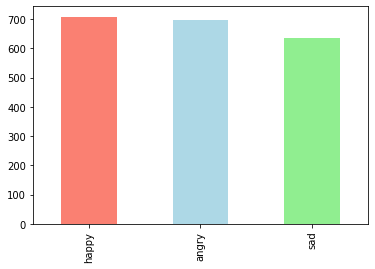

In [ ]:
New_Df["sentiment"].value_counts().plot(kind="bar", color=["salmon", "lightblue","lightgreen"]);

Una vez que visualizamos el contenido de las categorias, podemos ver que poseemos 3 datos categoricos  (Happy, Angry, Sad) convirtiendo nuestro problema en una clasificacion multivariable.
 
 
 
 
 
Muy bien vamos por buen camino, pero existe otro problema por delante, unicamente poseemos datos de tipo texto, y las redes neuronales no admiten texto como campo de entradas.
 
Por eso debemos hacer unos pasos extra antes de realizar nuestro modelo
 
 
 
1.   Tokens
2.   Vectorización
3.   One-Hot encode 
 
 
 
 
 
 
# Tokens
 
Es el proceso en el cual convertiremos parrafos u oraciones en unidades (tokens), que nos ayudara a dividir nuestro Corpus de texto, se puede entender este proceso como la preparacion para convertir nuestro texto en Vectores
 
a continuacion realizaremos la funcion:

In [ ]:
import string
punctuation = set(string.punctuation)  ##Punctuation identifica todos los simbolos !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~
 
def tokenize(sentence):
  tokens=[]  # Declaramos un array tokens
  for token in sentence.split():  ## separamos los párrafos por unidad 
        new_token = [] ##declaramos otro array que nos ayudará a almacenar los nuevos texto sin los símbolos 
        for character  in token:
            if character not in punctuation: ## utilizamos la librería punctuation para eliminar los símbolos 
                new_token.append(character.lower()) ## lower es una función  que convierte los caracteres en mayúsculas a minúsculas es muy necesario para el Vectorizer
        if new_token:
          tokens.append("".join(new_token))
 
  return tokens

Veremos un pequeño ejemplo de nuestra funcion de vectorizacion que nos ayudará a visualizar lo que nos retorna

In [ ]:
tokenize("we will train a Linear Regression Model!  and expect to perform correct on a fresh input.")

['we',
 'will',
 'train',
 'a',
 'linear',
 'regression',
 'model',
 'and',
 'expect',
 'to',
 'perform',
 'correct',
 'on',
 'a',
 'fresh',
 'input']

 Podemos ver que nuestra funcion logra separar nuestra oración en tokens y a su vez eliminando los símbolos que nos podrían traer problemas
 
##One Hot encoding y vectorizacion
 
Muy bien hasta ahora hemos preparado nuestro texto. Abrimos paso al siguiente problema
 
La vectorizacion
 
En este procedimiento asignamos una etiqueta a nuestro token esta etiqueta es representada por un vector lo cual permite a nuestro algoritmo ubicar palabras que estén relacionadas o que contengan un valor semántico similar.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
Vectorizer = CountVectorizer(
    tokenizer = tokenize,
    binary=True
)

In [ ]:
examples = [
    "Call FREEPHONE 0800 542 0578 now!",
    "Did you call me just now ah?"
]
Vectorizer.fit(examples)
vectors = Vectorizer.transform(examples).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [ ]:
headers = sorted(Vectorizer.vocabulary_.keys())
pd.DataFrame(vectors, columns=headers)

,0578,0800,542,ah,call,did,freephone,just,me,now,you
0,1,1,1,0,1,0,1,0,0,1,0
1,0,0,0,1,1,1,0,1,1,1,1


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
 
def remove_stopwords(text):
    x=[]
    for i in text.split():
        
        if i not in stopwords.words('english'):
            x.append(i)
    y=x[:]
    x.clear()
    return y
New_Df['content']=New_Df['content'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def join_back(list_input):
    return " ".join(list_input)
    
 
New_Df['content']=New_Df['content'].apply(join_back)

In [ ]:
New_Df

,content,sentiment
0,"Never hurt people love lot, won’t hurt back. B...",sad
1,Don’t expect tell wrong. If can’t figure yours...,sad
2,I preferred walking away fighting worth fighti...,sad
3,"Moving forward life isn’t hard part, it’s leav...",sad
4,"Never cry anyone life, cry don’t deserve tears...",sad
...,...,...
691,Is getting close walking away?,angry
692,Did ever want slap stupid someone?,angry
693,"Is singing, you’re angry & know punches face…",angry
694,Telling someone calm makes much angrier.,angry


In [ ]:
import nltk
 
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
y=[]
 
def stem_words(text):
    for i in text:
        y.append(ps.stem(i))
    z=y[:]
    y.clear()
    return z
 
New_Df['content']=New_Df['content'].apply(stem_words)

In [ ]:
def join_back2(list_input):
    return "".join(list_input)
    
 
New_Df['content']=New_Df['content'].apply(join_back2)

In [ ]:
New_Df

,content,sentiment
0,"Never hurt people love lot, won’t hurt back. B...",sad
1,Don’t expect tell wrong. If can’t figure yours...,sad
2,I preferred walking away fighting worth fighti...,sad
3,"Moving forward life isn’t hard part, it’s leav...",sad
4,"Never cry anyone life, cry don’t deserve tears...",sad
...,...,...
691,Is getting close walking away?,angry
692,Did ever want slap stupid someone?,angry
693,"Is singing, you’re angry & know punches face…",angry
694,Telling someone calm makes much angrier.,angry


In [ ]:
New_Df.head()['content'].apply(tokenize)

0    [never, hurt, people, love, lot, won’t, hurt, ...
1    [don’t, expect, tell, wrong, if, can’t, figure...
2    [i, preferred, walking, away, fighting, worth,...
3    [moving, forward, life, isn’t, hard, part, it’...
4    [never, cry, anyone, life, cry, don’t, deserve...
Name: content, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
train_text, test_text, train_labels, test_labels = train_test_split(New_Df["content"],
                                                                    New_Df["sentiment"],
                                                                    random_state=85)
print(f"Ejemplos de Entrenamiento: {len(train_text)}, Ejemplos de Prueba {len(test_text)}")

Ejemplos de Entrenamiento: 1529, Ejemplos de Prueba 510


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
Tv = TfidfVectorizer( min_df= 1, max_features=1500, strip_accents='unicode',analyzer='word',ngram_range=(1,3),stop_words='english', tokenizer=tokenize)
 
train_X = Tv.fit_transform(train_text).toarray()
X_test = Tv.transform(test_text).toarray()
 
 
train_X.shape

(1529, 1500)

In [ ]:
classNb =MultinomialNB()
classNb.fit(train_X, train_labels)
train_scores = classNb.score(train_X, train_labels)
 
 
classSVC =LinearSVC()
classSVC.fit(train_X, train_labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
from sklearn.metrics import accuracy_score
 
predictionNB = classNb.predict(X_test)
 
 
accuracyNB = accuracy_score(test_labels, predictionNB)
print(f"Accuracy NB: {accuracyNB:.4%}")
 
predictionSVC = classSVC.predict(X_test)
 
accuracySVC = accuracy_score(test_labels, predictionSVC)
print(f"Accuracy SVC: {accuracySVC:.4%}")

Accuracy NB: 67.4510%
Accuracy SVC: 72.5490%


In [ ]:
 
text1 = "Hey,  don't like when cats going crazy " 
text2 = " i just finally stopped crying, and here I go again... "
Text3 = "i really love the People who eat pasta" 
 
examples = [
      text1, 
      text2, 
      Text3
]
 
 
examples_X = Tv.transform(examples)
 
predicciones = classSVC.predict(examples_X)
 
for text, label in zip(examples, predicciones):
  print(f"{label:5} - {text}")
 
 
predicciones2 = classNb.predict(examples_X)
 
for text, label in zip(examples, predicciones2):
  print(f"{label:5} - {text}")

happy - Hey,  don't like when cats going crazy 
sad   -  i just finally stopped crying, and here I go again... 
happy - i really love the People who eat pasta
angry - Hey,  don't like when cats going crazy 
sad   -  i just finally stopped crying, and here I go again... 
happy - i really love the People who eat pasta
